In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
API_KEY = "0029e38539bf5edc4353852e289cd1c3"
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

In [3]:
cities = ["New York", "London", "Tokyo", "Sydney", "Mumbai"]

In [4]:
def get_weather_data(city):
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"  # Get temperature in Celsius
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        data = response.json()
        return {
            "City": city,
            "Temperature": data["main"]["temp"],
            "Weather": data["weather"][0]["description"],
            "Humidity": data["main"]["humidity"]
        }
    else:
        print(f"Failed to fetch data for {city}: {response.text}")
        return None

In [5]:
weather_data = []
for city in cities:
    data = get_weather_data(city)
    if data:
        weather_data.append(data)

In [6]:
df = pd.DataFrame(weather_data)
print(df)

       City  Temperature        Weather  Humidity
0  New York         0.32      clear sky        60
1    London         7.66  broken clouds        85
2     Tokyo         8.90  broken clouds        42
3    Sydney        29.49      clear sky        64
4    Mumbai        28.99          smoke        48


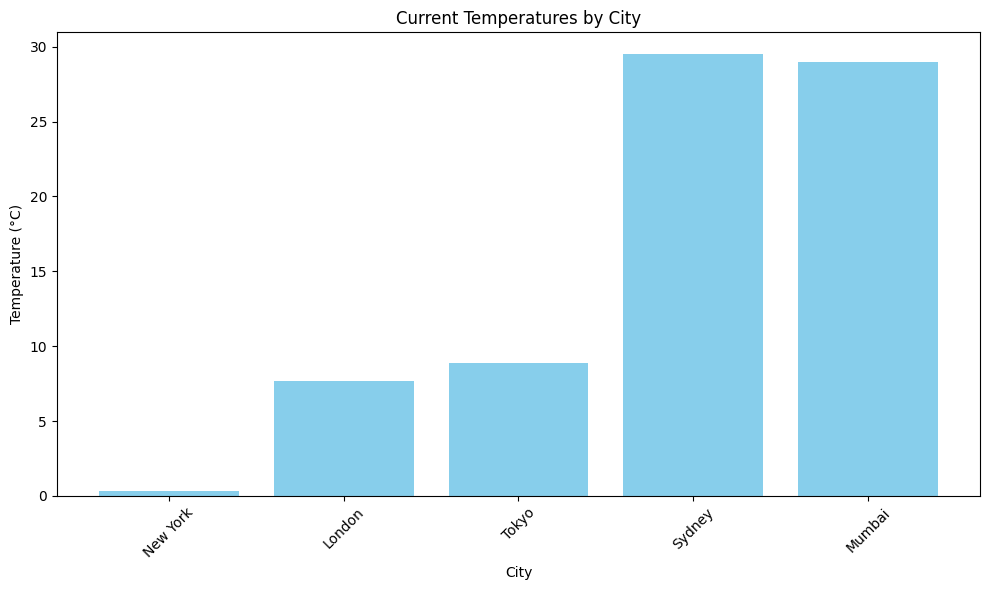

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(df["City"], df["Temperature"], color="skyblue")
plt.title("Current Temperatures by City")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
highest_temp_city = df.loc[df["Temperature"].idxmax()]
lowest_temp_city = df.loc[df["Temperature"].idxmin()]

In [9]:
print(f"City with the highest temperature: {highest_temp_city['City']} ({highest_temp_city['Temperature']}°C)")
print(f"City with the lowest temperature: {lowest_temp_city['City']} ({lowest_temp_city['Temperature']}°C)")

City with the highest temperature: Sydney (29.49°C)
City with the lowest temperature: New York (0.32°C)
